In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sts
import numpy as np

In [3]:
# pull csv file
df = pd.read_csv('AB_NYC_2019_clean.csv')
df.head()

,Unnamed: 0,id,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,0,2539,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,1,2595,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,2,3647,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365
3,3,3831,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,4,5022,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


In [4]:
# create new df for neighbourhood and room type
br_df = df[['id','neighbourhood_group','room_type','price']]
br_df.head()
br_df['neighbourhood_group'].value_counts()

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

In [5]:
#create bounds
lowerq = br_df['price'].quantile([.25,.5,.75])[0.25]
upperq = br_df['price'].quantile([.25,.5,.75])[0.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

br_df = br_df.loc[(br_df['price'] > 0) & (br_df['price'] < upper_bound) ]

In [11]:
brooklyn_df = br_df.loc[(br_df['neighbourhood_group'] == 'Brooklyn')]
manhattan_df = br_df.loc[(br_df['neighbourhood_group'] == 'Manhattan')]
queens_df = br_df.loc[(br_df['neighbourhood_group'] == 'Queens')]
bronx_df = br_df.loc[(br_df['neighbourhood_group'] == 'Bronx')]
staten_island_df = br_df.loc[(br_df['neighbourhood_group'] == 'Staten Island')]

brooklyn_df.head()

,id,neighbourhood_group,room_type,price
0,2539,Brooklyn,Private room,149
3,3831,Brooklyn,Entire home/apt,89
6,5121,Brooklyn,Private room,60
12,5803,Brooklyn,Private room,89
15,6848,Brooklyn,Entire home/apt,140


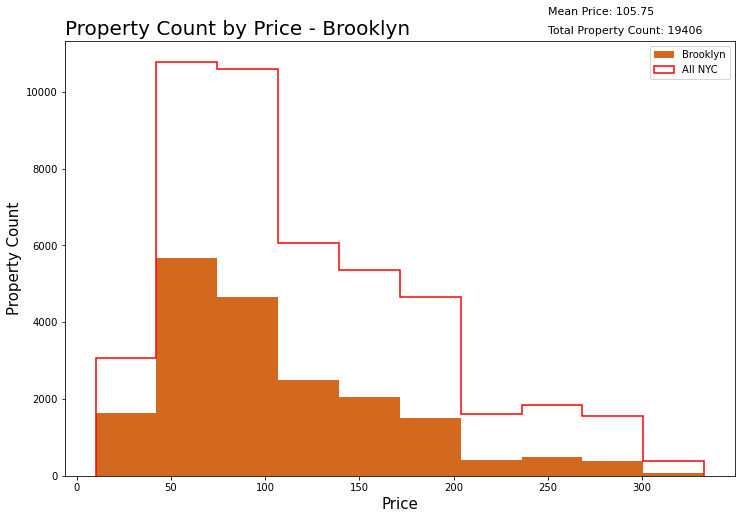

In [149]:
plt.figure(figsize=(12,8))
plt.hist(brooklyn_df['price'],color='chocolate',label='Brooklyn',bins=10)
plt.hist(br_df['price'] ,histtype=u'step', edgecolor='red',
              linewidth=1.5,label='All NYC',bins=10)
plt.legend(loc='upper right')
plt.ylabel('Property Count',fontsize=15)
plt.xlabel('Price',fontsize=15)
plt.title('Property Count by Price - Brooklyn',fontsize=20,loc='left')


plt.text(250, 11500, 'Total Property Count: '+ str(len(brooklyn_df)), fontsize=11)
plt.text(250, 12000, 'Mean Price: '+ str(round(brooklyn_df['price'].mean(),2)), fontsize=11)

plt.savefig("histBrooklynv1.png")

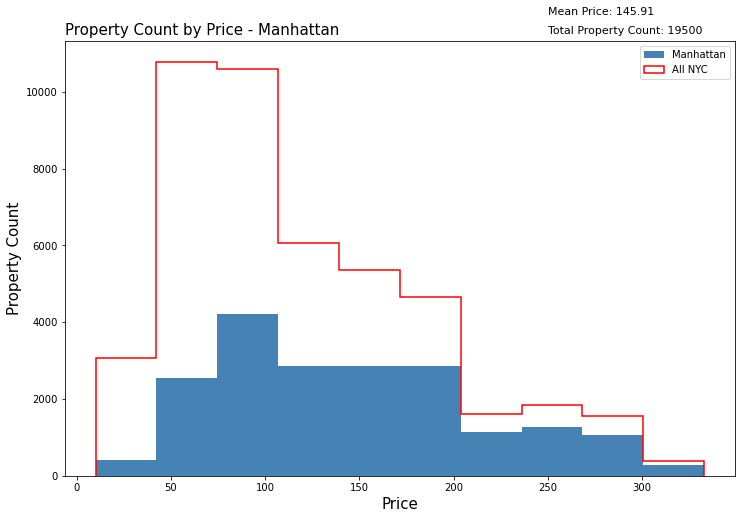

In [147]:
plt.figure(figsize=(12,8))
plt.hist(manhattan_df['price'],color='steelblue',label='Manhattan',bins=10)
plt.hist(br_df['price'] ,histtype=u'step', edgecolor='red',
              linewidth=1.5,label='All NYC',bins=10)
plt.legend(loc='upper right')
plt.ylabel('Property Count',fontsize=15)
plt.xlabel('Price',fontsize=15)
plt.title('Property Count by Price - Manhattan',fontsize=15,loc='left')


plt.text(250, 11500, 'Total Property Count: '+ str(len(manhattan_df)), fontsize=11)
plt.text(250, 12000, 'Mean Price: '+ str(round(manhattan_df['price'].mean(),2)), fontsize=11)
plt.savefig("histManhattanv1.png")

Text(250, 12000, 'Mean Price: 88.9')

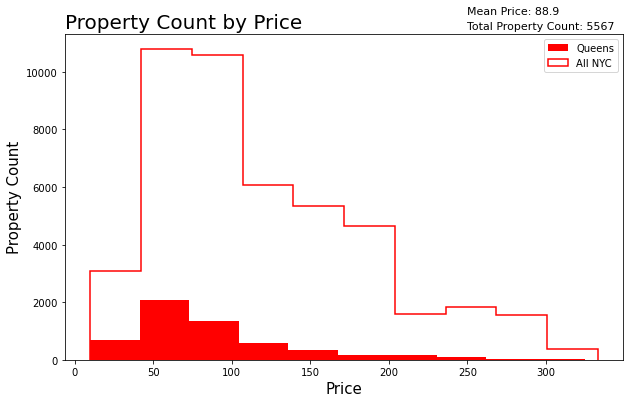

In [134]:
plt.figure(figsize=(10,6))
plt.hist(queens_df['price'],color='red',label='Queens',bins=10)
plt.hist(br_df['price'] ,histtype=u'step', edgecolor='red',
              linewidth=1.5,label='All NYC',bins=10)
plt.legend(loc='upper right')
plt.ylabel('Property Count',fontsize=15)
plt.xlabel('Price',fontsize=15)
plt.title('Property Count by Price',fontsize=20,loc='left')


plt.text(250, 11500, 'Total Property Count: '+ str(len(queens_df)), fontsize=11)
plt.text(250, 12000, 'Mean Price: '+ str(round(queens_df['price'].mean(),2)), fontsize=11)

Text(250, 12000, 'Mean Price: 77.44')

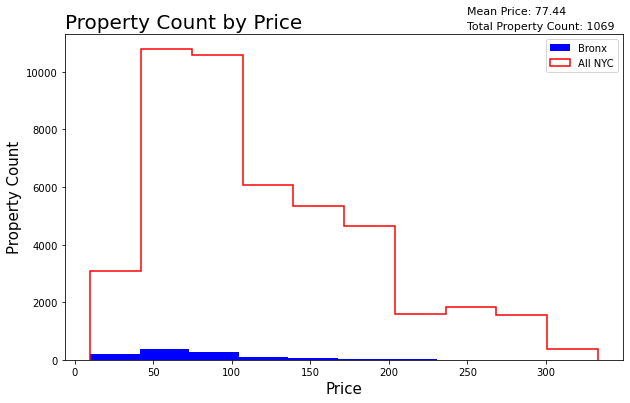

In [135]:
plt.figure(figsize=(10,6))
plt.hist(bronx_df['price'],color='blue',label='Bronx',bins=10)
plt.hist(br_df['price'] ,histtype=u'step', edgecolor='red',
              linewidth=1.5,label='All NYC',bins=10)
plt.legend(loc='upper right')
plt.ylabel('Property Count',fontsize=15)
plt.xlabel('Price',fontsize=15)
plt.title('Property Count by Price',fontsize=20,loc='left')



plt.text(250, 11500, 'Total Property Count: '+ str(len(bronx_df)), fontsize=11)
plt.text(250, 12000, 'Mean Price: '+ str(round(bronx_df['price'].mean(),2)), fontsize=11)

Text(250, 11500, 'Total Property Count: 365')

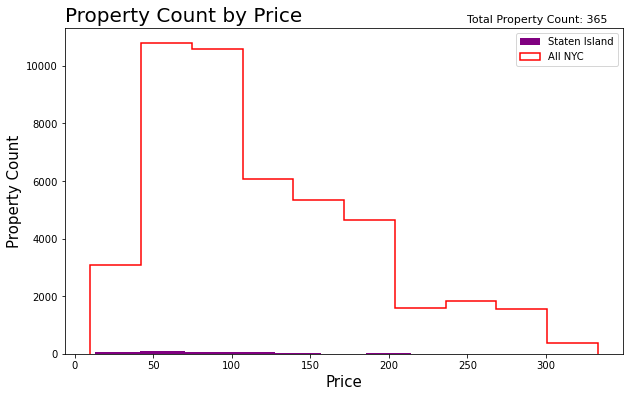

In [114]:
plt.figure(figsize=(10,6))
plt.hist(staten_island_df['price'],color='purple',label='Staten Island',bins=10)
plt.hist(br_df['price'] ,histtype=u'step', edgecolor='red',
              linewidth=1.5,label='All NYC',bins=10)
plt.legend(loc='upper right')
plt.ylabel('Property Count',fontsize=15)
plt.xlabel('Price',fontsize=15)
plt.title('Property Count by Price',fontsize=20,loc='left')


plt.text(250, 11500, 'Total Property Count: '+ str(len(staten_island_df)), fontsize=11)